# Importing Libraries

In [1]:
from lxml import etree
import numpy as np
import pandas as pd
import os
from skimage import io
from skimage.transform import resize

import keras
from keras.layers import Input, InputLayer, Dense, Flatten, Reshape, Conv2D, Conv2DTranspose, MaxPool2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from keras.models import Model, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
import scipy.misc
from PIL import Image
from keras.utils import np_utils

os.environ["KERAS_BACKEND"] = "tensorflow"
kerasBKED = os.environ["KERAS_BACKEND"] 

import cv2
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential


Using TensorFlow backend.


# Data Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%cd drive/My\ Drive/Colab\ Notebooks/Computer\ Vision
# pwd


/content/drive/My Drive/Colab Notebooks/Computer Vision


##Read the saved images


In [0]:
#Change image_size and the file names to be loaded.

image_size = 192  # For CNN
image_size2 = 128 # For auto encoders
n_channels = 3

#2 classes
n1_classes = 2
train_df = pd.read_pickle('X_Train_2classes_128_128.pkl')
x_train_array = np.array(train_df['Image_Array'].values.tolist())
x_train2 = x_train_array.reshape(x_train_array.shape[0],image_size2,image_size2,3)
y_train2 = np.array(train_df['Class'].values.tolist())

val_df = pd.read_pickle('X_Val_2classes_128_128.pkl')
x_val_array = np.array(val_df['Image_Array'].values.tolist())
x_val2 = x_val_array.reshape(x_val_array.shape[0],image_size2,image_size2,3)
y_val2 = np.array(val_df['Class'].values.tolist())

test_df = pd.read_pickle('X_Test_2classes_128_128.pkl')
test_df.reset_index(drop=True,inplace=True)
x_test_array = np.array(test_df['Image_Array'].values.tolist())
x_test2 = x_test_array.reshape(x_test_array.shape[0],image_size2,image_size2,3)
y_test2 = np.array(test_df['Class'].values.tolist())

#3 classes
n_classes = 3
train_df = pd.read_pickle('X_Train_3classes_192_192.pkl')
x_train_array = np.array(train_df['Image_Array'].values.tolist())
x_train = x_train_array.reshape(x_train_array.shape[0],image_size,image_size,3)
y_train = np.array(train_df['Class'].values.tolist())

val_df = pd.read_pickle('X_Val_3classes_192_192.pkl')
x_val_array = np.array(val_df['Image_Array'].values.tolist())
x_val = x_val_array.reshape(x_val_array.shape[0],image_size,image_size,3)
y_val = np.array(val_df['Class'].values.tolist())

test_df = pd.read_pickle('X_Test_3classes_192_192.pkl')
test_df.reset_index(drop=True,inplace=True)
x_test_array = np.array(test_df['Image_Array'].values.tolist())
x_test = x_test_array.reshape(x_test_array.shape[0],image_size,image_size,3)
y_test = np.array(test_df['Class'].values.tolist())



In [5]:
print("2: train:",x_train2.shape,"\nval:",x_val2.shape,"\ntest:", x_test2.shape)
print("3: train:",x_train.shape,"\nval:",x_val.shape,"\ntest:", x_test.shape)

2: train: (578, 128, 128, 3) 
val: (376, 128, 128, 3) 
test: (200, 128, 128, 3)
3: train: (748, 192, 192, 3) 
val: (431, 192, 192, 3) 
test: (300, 192, 192, 3)


## Normalization

In [0]:
#2 classes
x_train2 = x_train2.astype('float32')
x_val2 = x_val2.astype('float32')
x_test2 = x_test2.astype('float32')
x_train2 /= 255
x_val2 /= 255
x_test2 /= 255


#3 classes
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_val /= 255
x_test /= 255


In [0]:
def print_gray(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray_img,cmap='gray')

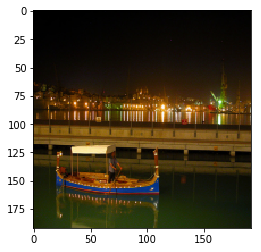

In [8]:
# plt.imshow(x_train[100]) #dog
# plt.imshow(x_train[200]) #bird
plt.imshow(x_train[350]) #boat


### t-SNE Visualization
In report 

### Convert 3D arrays into vectors


In [0]:

#2 classes
x_train2_f = x_train2.reshape((len(x_train2), np.prod(x_train2.shape[1:])))
x_test2_f = x_test2.reshape((len(x_test2), np.prod(x_test2.shape[1:])))
x_val2_f = x_val2.reshape((len(x_val2),np.prod(x_val2.shape[1:])))

print("2class:", x_train2_f.shape, x_val2_f.shape, x_test2_f.shape)

#3 classes
x_train_f = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_f = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_val_f = x_val.reshape((len(x_val),np.prod(x_val.shape[1:])))

print("3class:", x_train_f.shape, x_val_f.shape, x_test_f.shape)


2class: (578, 49152) (376, 49152) (200, 49152)
3class: (748, 110592) (431, 110592) (300, 110592)


In [0]:
img_shape2 = x_train2.shape[1:]
img_shape2_f = x_train2_f.shape[1:]

img_shape = x_train.shape[1:]
img_shape_f = x_train_f.shape[1:]

(img_shape2, img_shape2_f, img_shape, img_shape_f)
# (img_shape, img_shape_f)

((128, 128, 3), (49152,), (192, 192, 3), (110592,))

# 2.1 AUTO ENCODERS vs PCA


# The encoder function uses a ReLU activation function, while the decoder function uses a sigmoid activation function.

https://ramhiser.com/post/2018-05-14-autoencoders-with-keras/

## Converting PASCAL dataset into gray images

In [0]:

X_Train_Gray = x_train2.copy()
X_Val_Gray = x_val2.copy()
X_Test_Gray = x_test2.copy()

X_Train_gray_list = []

for i in range(len(X_Train_Gray)):
    img = X_Train_Gray[i].reshape(image_size2,image_size2,n_channels)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    X_Train_gray_list.append(gray)

X_Val_gray_list = []
for i in range(len(X_Val_Gray)):
    img = X_Val_Gray[i].reshape(image_size2,image_size2,n_channels)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    X_Val_gray_list.append(gray)

X_Test_gray_list = []
for i in range(len(X_Test_Gray)):
    img = X_Test_Gray[i].reshape(image_size2,image_size2,n_channels)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    X_Test_gray_list.append(gray)

df = pd.DataFrame()
df['Train_Gray'] = X_Train_gray_list
X_Train_gray_array = np.array(df['Train_Gray'].values.tolist())

df = pd.DataFrame()
df['Val_Gray'] = X_Val_gray_list
X_Val_gray_array = np.array(df['Val_Gray'].values.tolist())

df = pd.DataFrame()
df['Test_Gray'] = X_Test_gray_list
X_Test_gray_array = np.array(df['Test_Gray'].values.tolist())

X_Train_gray_array = X_Train_gray_array.reshape((X_Train_gray_array.shape[0], -1))
X_Val_gray_array = X_Val_gray_array.reshape((X_Val_gray_array.shape[0], -1))
X_Test_gray_array = X_Test_gray_array.reshape((X_Test_gray_array.shape[0], -1))

print(X_Train_gray_array.shape)
print(X_Val_gray_array.shape)
print(X_Test_gray_array.shape)

(578, 16384)
(376, 16384)
(200, 16384)


In [0]:
input_dim = X_Train_gray_array.shape[1]
encoding_dim = 256 # 20*20 

compression_factor = float(input_dim) / encoding_dim
print("Compression factor: %s" % compression_factor)


Compression factor: 64.0


In [0]:
input_shape = image_size2*image_size2
inputs = Input(shape=(input_shape,), name='input')                       #input layer

layer1 = Dense(encoding_dim*2,activation='linear')(inputs)
encoded_layer = Dense(encoding_dim, activation='linear')(layer1)       #hidden layer => represents codes
layer2 = Dense(encoding_dim*2,activation='linear')(encoded_layer)
outputs = Dense(input_shape, activation='softmax', name='output')(layer2)  #output layer

autoencoder = Model(inputs, outputs)
print(autoencoder.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 16384)             0         
_________________________________________________________________
dense_33 (Dense)             (None, 512)               8389120   
_________________________________________________________________
dense_34 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_35 (Dense)             (None, 512)               131584    
_________________________________________________________________
output (Dense)               (None, 16384)             8404992   
Total params: 17,057,024
Trainable params: 17,057,024
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['mse'])

autoencoder.fit(X_Train_gray_array, X_Train_gray_array,epochs=20,batch_size=64,shuffle=True,
                validation_data=(X_Val_gray_array, X_Val_gray_array))

Train on 578 samples, validate on 376 samples
Epoch 1/20
578/578 [==============================] - 5s 9ms/step - loss: 4.4055 - mean_squared_error: 0.2436 - val_loss: 4.1771 - val_mean_squared_error: 0.2402
Epoch 2/20
578/578 [==============================] - 3s 5ms/step - loss: 4.2445 - mean_squared_error: 0.2436 - val_loss: 4.1658 - val_mean_squared_error: 0.2402
Epoch 3/20
578/578 [==============================] - 3s 5ms/step - loss: 4.2038 - mean_squared_error: 0.2436 - val_loss: 4.1565 - val_mean_squared_error: 0.2402
Epoch 4/20
578/578 [==============================] - 3s 5ms/step - loss: 4.2020 - mean_squared_error: 0.2436 - val_loss: 4.1527 - val_mean_squared_error: 0.2402
Epoch 5/20
578/578 [==============================] - 3s 5ms/step - loss: 4.1907 - mean_squared_error: 0.2436 - val_loss: 4.1480 - val_mean_squared_error: 0.2402
Epoch 6/20
578/578 [==============================] - 3s 5ms/step - loss: 4.1883 - mean_squared_error: 0.2436 - val_loss: 4.1443 - val_mean_squa

In [0]:
score = autoencoder.evaluate(X_Test_gray_array, X_Test_gray_array, verbose=1)
print(score)

# LOSS 4.163673019409179
# MSE 0.2422286707162857

200/200 [==============================] - 0s 1ms/step
[4.137154541015625, 0.24222928762435914]


# Visualize Original and Reconstructed Images

[121, 86, 52, 183, 157]
Reconstruction error on the Test set: 0.4941


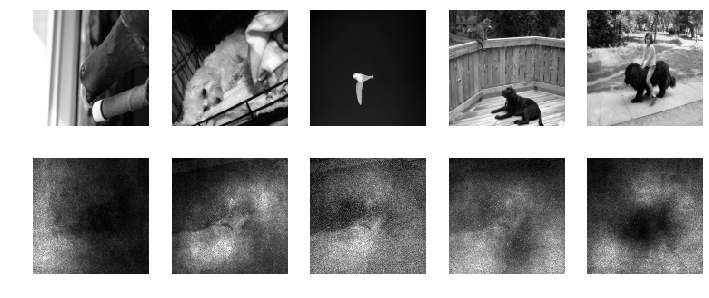

In [0]:
import random

gray_test_predicted = autoencoder.predict(X_Test_gray_array)

num_images = 5
random_indices = [random.randint(0, df.shape[0]) for i in range(num_images)] 
print(random_indices)
reconstruction_error_list = []
fig = plt.figure(figsize=(12,5))
ax = fig.subplots(2, 5)
i=0
for index in random_indices:
    act = X_Test_gray_array[index].reshape(image_size2,image_size2)
    dec = gray_test_predicted[index].reshape(image_size2,image_size2)
    reconstruction_error_list.append(np.mean(((dec-act)*(dec-act))))
    ax[0,i].imshow(act, cmap='gray')
    ax[0,i].axis('off')
    ax[1,i].imshow(dec, cmap='gray')
    ax[1,i].axis('off')
    i+=1

print('Reconstruction error on the Test set: ' + str(np.round(np.sqrt(np.mean(reconstruction_error_list)),4)))
plt.show()

## Convolution NN


## Reference:
https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5

In [0]:
image_size
input_img = Input(shape=(image_size,image_size,3)) #192*192*3

W0813 09:13:36.933643 140679652984704 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0813 09:13:36.980127 140679652984704 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



In [0]:
def cnn_net1(input_img):
    #encoder
    conv1 = Conv2D(256, (3, 3), activation='relu', padding='same')(input_img) 
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1) 
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool2) 
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool3) 
    
    #decoder
    conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv4) 
    up1 = UpSampling2D((2,2))(conv5) 
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) 
    up2 = UpSampling2D((2,2))(conv6) 
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up2) 
    up3 = UpSampling2D((2,2))(conv7) 
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(up3) 
    return decoded
  
def cnn_net2(input_img):
    #encoder
    conv1 = Conv2D(256, (3, 3), activation='relu', padding='same')(input_img) 
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1) 
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool2) 
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool3)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(pool4)
    pool5 = MaxPooling2D(pool_size=(2, 2))(conv5)
    conv6 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool5)
    
    #decoder
    conv7 = Conv2D(8, (3, 3), activation='relu', padding='same')(conv6) 
    up1 = UpSampling2D((2,2))(conv7) 
    conv8 = Conv2D(16, (3, 3), activation='relu', padding='same')(up1) 
    up2 = UpSampling2D((2,2))(conv8)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up2)
    up3 = UpSampling2D((2,2))(conv9)
    conv10 = Conv2D(64, (3, 3), activation='relu', padding='same')(up3)
    up4 = UpSampling2D((2,2))(conv10)
    conv11 = Conv2D(128, (3, 3), activation='relu', padding='same')(up4)
    up5 = UpSampling2D((2,2))(conv11)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(up5)
    return decoded

In [0]:
cnn_net1 = Model(input_img, cnn_net1(input_img))
cnn_net1.summary()



W0812 19:07:56.828525 139865374160768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0812 19:07:56.899725 139865374160768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 192, 192, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 192, 192, 256)     7168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 96, 96, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 128)       295040    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 64)        73792     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 64)        0         
__________

In [0]:
cnn_net2 = Model(input_img, cnn_net2(input_img))
cnn_net2.summary()


W0813 09:13:46.226375 140679652984704 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0813 09:13:46.275443 140679652984704 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0813 09:13:46.363912 140679652984704 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 192, 192, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 192, 192, 256)     7168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 96, 96, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 128)       295040    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 64)        73792     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 64)        0         
__________

In [0]:
from keras.utils.vis_utils import plot_model
# plot_model(cnn_net1, to_file='Model_plot_1.png', show_shapes=True, show_layer_names=True)
plot_model(cnn_net2, to_file='Model_plot_2.png', show_shapes=True, show_layer_names=True)

In [0]:
batch_size = 32
epochs = 100

In [0]:
!pip install livelossplot
from livelossplot import PlotLossesKeras

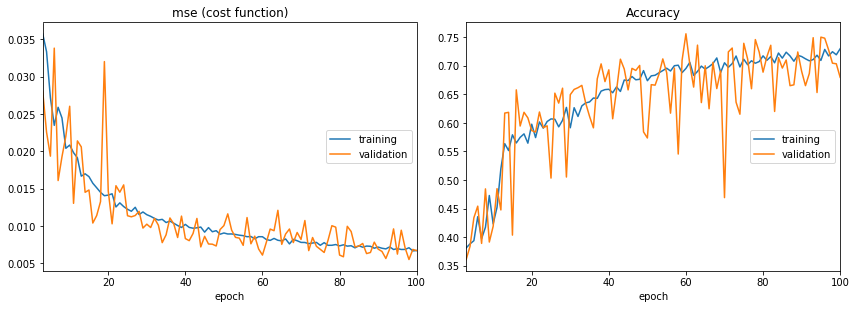

mse (cost function):
training   (min:    0.007, max:    0.069, cur:    0.007)
validation (min:    0.006, max:    0.047, cur:    0.007)

Accuracy:
training   (min:    0.381, max:    0.730, cur:    0.730)
validation (min:    0.361, max:    0.756, cur:    0.680)


In [0]:
# cnn_net1.compile(loss='mse', optimizer = 'rmsprop')
cnn_net1.compile(loss='mse', optimizer = 'rmsprop', metrics = ['accuracy'])

ae1_train = cnn_net1.fit(x_train, x_train, 
                                    epochs=epochs,
                                    verbose=1,
                                    validation_data=(x_val, x_val),
                                    callbacks=[PlotLossesKeras(), 
                                               ModelCheckpoint(filepath='new_cnn1_rgb_' + str(image_size) + '.h5', monitor='val_loss', save_best_only=True)])

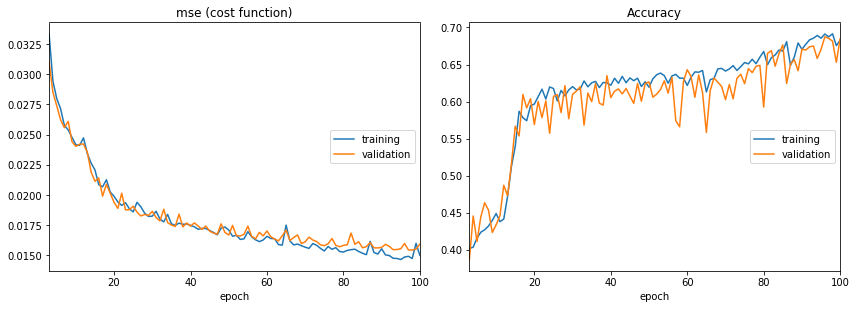

mse (cost function):
training   (min:    0.015, max:    0.065, cur:    0.015)
validation (min:    0.015, max:    0.057, cur:    0.016)

Accuracy:
training   (min:    0.401, max:    0.691, cur:    0.683)
validation (min:    0.387, max:    0.687, cur:    0.685)


In [0]:
# cnn_net2.compile(loss='mse', optimizer = 'rmsprop')
cnn_net2.compile(loss='mse', optimizer = 'adam', metrics = ['accuracy'])

ae2_train = cnn_net2.fit(x_train, x_train, 
                                    epochs=epochs,
                                    verbose=1,
                                    validation_data=(x_val, x_val),
                                    callbacks=[PlotLossesKeras(), 
                                               ModelCheckpoint(filepath='new_cnn2_rgb_' + str(image_size) + '.h5', monitor='val_loss', save_best_only=True)])

## Loading the 2 saved cnn models

In [0]:
# cnn_net1 = load_model('cnn_1_rgb_192.h5')
# cnn_net2 = load_model('cnn_2_rgb_192.h5')

new_cnn_net1 = load_model('new_cnn1_rgb_192.h5')
new_cnn_net2 = load_model('new_cnn2_rgb_192.h5')


In [0]:
# score1 = cnn_net1.evaluate(x_test, x_test, verbose=1)
# score2 = cnn_net2.evaluate(x_test, x_test, verbose=1)

score1 = new_cnn_net1.evaluate(x_test, x_test, verbose=1)
score2 = new_cnn_net2.evaluate(x_test, x_test, verbose=1)
print(score1,"\n",score2)

# [0.5487392751375834, 0.011495225553711255, 0.007246668320149184] 
# [0.5729965162277222, 0.011443112442890802, 0.017364070887366932]

# [0.006002987747391065, 0.7102219033241272] 
# [0.016866218149662018, 0.6848008012771607]

300/300 [==============================] - 31s 103ms/step
[0.006002987747391065, 0.7102219033241272] 
 [0.016866218149662018, 0.6848008012771607]


In [0]:
# predict1_test = cnn_net1.predict(x_test)
# predict1_val = cnn_net1.predict(x_val)

# predict2_test = cnn_net2.predict(x_test)
# predict2_val = cnn_net2.predict(x_val)

predict1_test = new_cnn_net1.predict(x_test)
predict1_val = new_cnn_net1.predict(x_val)

predict2_test = new_cnn_net2.predict(x_test)
predict2_val = new_cnn_net2.predict(x_val)



In [0]:
print(predict1_test.shape)
print(predict1_val.shape)
print(predict2_test.shape)
print(predict2_val.shape)

(300, 192, 192, 3)
(431, 192, 192, 3)
(300, 192, 192, 3)
(431, 192, 192, 3)


In [0]:
def showOrigDec(orig, dec1, dec2, num=5):
    n = num
    plt.figure(figsize=(20, 10))

    for i in range(n):
        # display original
        ax = plt.subplot(3, n, i+1)
        plt.imshow(orig[i].reshape(image_size, image_size, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction by cnn net1
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(dec1[i].reshape(image_size, image_size, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        # display reconstruction by cnn net1
        ax = plt.subplot(3, n, i + 1 + n + n)
        plt.imshow(dec2[i].reshape(image_size, image_size, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

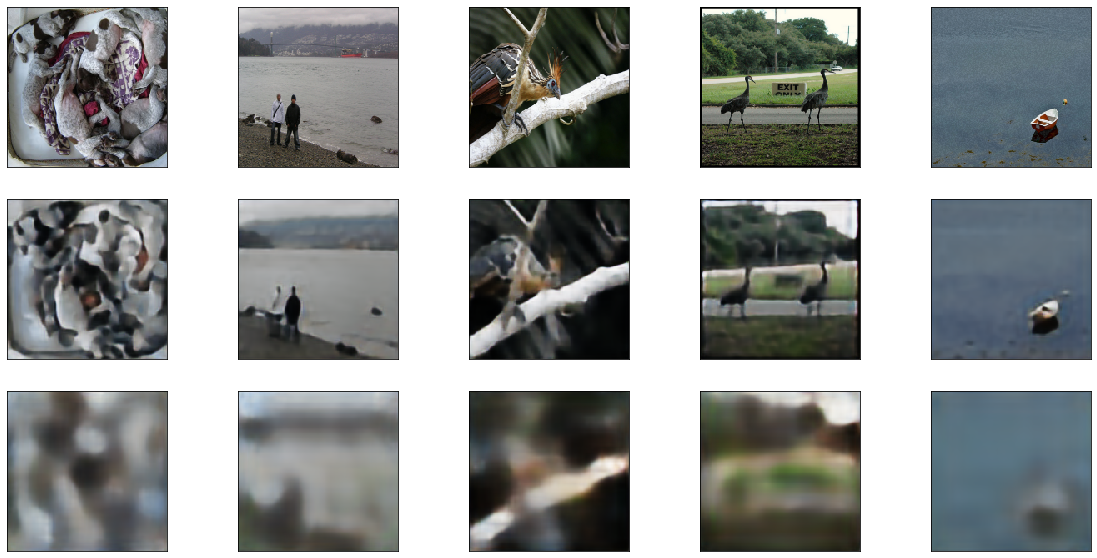

In [0]:
#Loss = mse
showOrigDec(x_test, predict1_test, predict2_test)


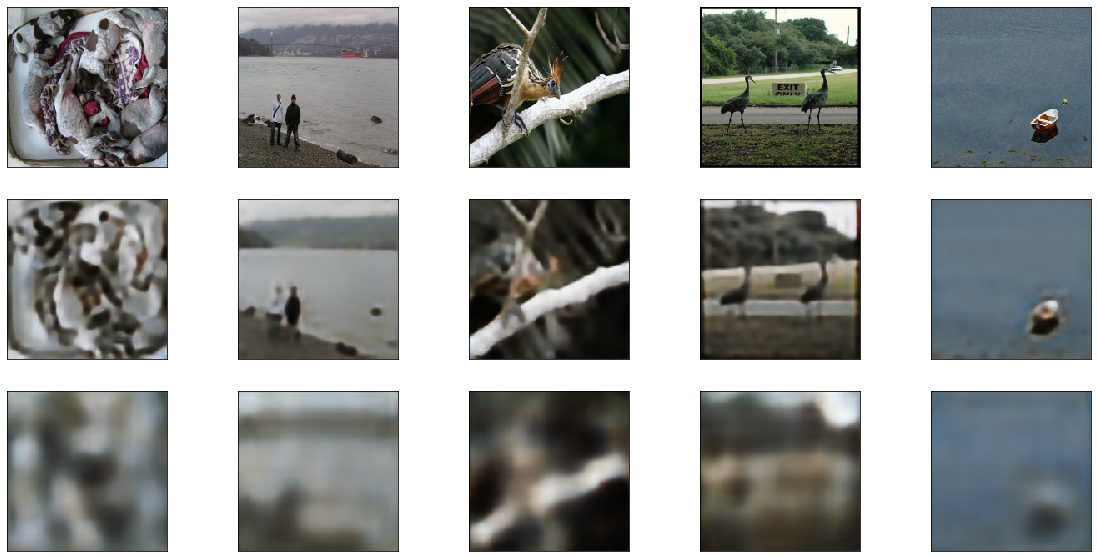

In [0]:
#Loss = binary_crossentropy
showOrigDec(x_test, predict1_test, predict2_test)


## Do Not Delete

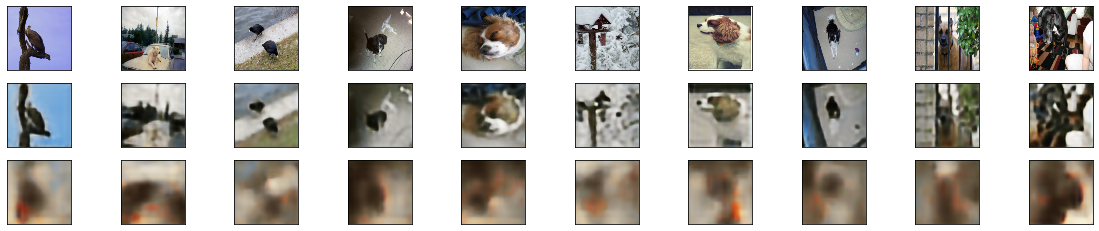

In [0]:
showOrigDec(x_test, predict1_test, predict2_test)
